In [1]:
# General data and plotting
import json
import datetime as dt
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import os
%matplotlib inline

# ML
# Preprocessing
from sklearn import preprocessing

# Modeling
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier

# parameter tuning
from sklearn import metrics
from sklearn.model_selection import KFold
from sklearn.cross_validation import train_test_split

/Users/Cronin/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


# Get Data

In [2]:
!pwd

/Users/Cronin/Datascience/portfolio/charles/ds-interview-guidebook


In [3]:
# Get Data and Format File
# set current working directory
WkDir = os.path.join(os.environ['HOME'], 'datascience/portfolio/charles/ds-interview-guidebook/')

In [4]:
WkDir

'/Users/Cronin/datascience/portfolio/charles/ds-interview-guidebook/'

In [5]:
os.chdir(WkDir)
os.getcwd() # getting just to confirm its the right directory

'/Users/Cronin/Datascience/portfolio/charles/ds-interview-guidebook'

In [6]:
# get file
JsonFile = open('rideshare_user_history.json', 'r').read()  # reads text of file as string

In [7]:
JsonFile[0:1000] # looking at first 1000 characters of string

'[{"city": "King\'s Landing", "trips_in_first_30_days": 4, "signup_date": "2014-01-25", "avg_rating_of_driver": 4.7, "avg_surge": 1.1, "last_trip_date": "2014-06-17", "phone": "iPhone", "surge_pct": 15.4, "black_car_user": true, "weekday_pct": 46.2, "avg_dist": 3.67, "avg_rating_by_driver": 5.0}, {"city": "Astapor", "trips_in_first_30_days": 0, "signup_date": "2014-01-29", "avg_rating_of_driver": 5.0, "avg_surge": 1.0, "last_trip_date": "2014-05-05", "phone": "Android", "surge_pct": 0.0, "black_car_user": false, "weekday_pct": 50.0, "avg_dist": 8.26, "avg_rating_by_driver": 5.0}, {"city": "Astapor", "trips_in_first_30_days": 3, "signup_date": "2014-01-06", "avg_rating_of_driver": 4.3, "avg_surge": 1.0, "last_trip_date": "2014-01-07", "phone": "iPhone", "surge_pct": 0.0, "black_car_user": false, "weekday_pct": 100.0, "avg_dist": 0.77, "avg_rating_by_driver": 5.0}, {"city": "King\'s Landing", "trips_in_first_30_days": 9, "signup_date": "2014-01-10", "avg_rating_of_driver": 4.6, "avg_surg

In [8]:
JsonLoad = json.loads(JsonFile)  # converts string to parsed json, figures out where to separate the string json

In [9]:
# read file head
JsonLoad[:2]

[{u'avg_dist': 3.67,
  u'avg_rating_by_driver': 5.0,
  u'avg_rating_of_driver': 4.7,
  u'avg_surge': 1.1,
  u'black_car_user': True,
  u'city': u"King's Landing",
  u'last_trip_date': u'2014-06-17',
  u'phone': u'iPhone',
  u'signup_date': u'2014-01-25',
  u'surge_pct': 15.4,
  u'trips_in_first_30_days': 4,
  u'weekday_pct': 46.2},
 {u'avg_dist': 8.26,
  u'avg_rating_by_driver': 5.0,
  u'avg_rating_of_driver': 5.0,
  u'avg_surge': 1.0,
  u'black_car_user': False,
  u'city': u'Astapor',
  u'last_trip_date': u'2014-05-05',
  u'phone': u'Android',
  u'signup_date': u'2014-01-29',
  u'surge_pct': 0.0,
  u'trips_in_first_30_days': 0,
  u'weekday_pct': 50.0}]

In [10]:
# convert list of dictionaries to pd.Dataframe
Df = pd.DataFrame(JsonLoad)
DfBackup = Df.copy()

In [11]:
# Below: Some dictionaries won't have all the keys. First dictionary could have 10 keys, last 20 keys as an example.

In [12]:
# !!! THIS SECTION IS AN FYI, DON'T RUN IT.  IT TAKES A LONG TIME!!!
# Flatten Dictionaries in Case Different Number of Keys
# in case file dictionaries have different sets of keys
JsonChklst = []
for blob in JsonLoad:
    for key in blob.keys():
        JsonChklst.append(key)
UnqKeys = set(JsonChklst)

# initialize df with UnqKeys for columns
# Df = pd.DataFrame(columns=UnqKeys)

# populate 3 rows as test
# for blob in JsonLoad[:2]:
#     LolNewVals = [blob.values()]
#     ListNewKeys = blob.keys()
#     DfNewRow = pd.DataFrame(data=LolNewVals, columns=ListNewKeys)
#     Df = Df.append(DfNewRow, ignore_index=True)

# # populate all rows
# for blob in JsonLoad:
#     LolNewVals = [blob.values()]
#     ListNewKeys = blob.keys()
#     DfNewRow = pd.DataFrame(data=LolNewVals, columns=ListNewKeys)
#     Df = Df.append(DfNewRow, ignore_index=True)

# Inspect and Clean Data

In [13]:
Df.head()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,black_car_user,city,last_trip_date,phone,signup_date,surge_pct,trips_in_first_30_days,weekday_pct
0,3.67,5.0,4.7,1.10,True,King's Landing,2014-06-17,iPhone,2014-01-25,15.4,4,46.2
1,8.26,5.0,5.0,1.00,False,Astapor,2014-05-05,Android,2014-01-29,0.0,0,50.0
2,0.77,5.0,4.3,1.00,False,Astapor,2014-01-07,iPhone,2014-01-06,0.0,3,100.0
3,2.36,4.9,4.6,1.14,True,King's Landing,2014-06-29,iPhone,2014-01-10,20.0,9,80.0
4,3.13,4.9,4.4,1.19,False,Winterfell,2014-03-15,Android,2014-01-27,11.8,14,82.4


In [14]:
Df.shape

(50000, 12)

In [15]:
Df.dtypes

avg_dist                  float64
avg_rating_by_driver      float64
avg_rating_of_driver      float64
avg_surge                 float64
black_car_user               bool
city                       object
last_trip_date             object
phone                      object
signup_date                object
surge_pct                 float64
trips_in_first_30_days      int64
weekday_pct               float64
dtype: object

## data types

In [16]:
# since this block involves a lot of re-writing fields, copying the original dataframe
# is a good idea so you don't have to scroll to the top to regenerate it
Df = DfBackup.copy()

In [17]:
Df['last_trip_date'][0:5]

0    2014-06-17
1    2014-05-05
2    2014-01-07
3    2014-06-29
4    2014-03-15
Name: last_trip_date, dtype: object

In [18]:
# dates
Df['last_trip_date'] = pd.to_datetime(Df['last_trip_date'])
Df['signup_date'] = pd.to_datetime(Df['signup_date'])

In [19]:
Df['last_trip_date'][0:5]

0   2014-06-17
1   2014-05-05
2   2014-01-07
3   2014-06-29
4   2014-03-15
Name: last_trip_date, dtype: datetime64[ns]

In [20]:
Df['last_trip_date'].max()

Timestamp('2014-07-01 00:00:00')

In [21]:
# Create Churn Column
# What is the date of 30 days before "Today".Df['last_trip_date'].max() is the very last date any rider took. 
# Proxy for being retained "today"
TimeCutoff = Df['last_trip_date'].max() - dt.timedelta(days=30) 
Df['churn'] = np.where(Df['last_trip_date'] < TimeCutoff, 1, 0) # 1 -> person left, 0 -> person stayed

In [ ]:
# convert dates to numeric
date_diff = (Df['signup_date'] - Df['signup_date'].min()) # of days from earliest signup date

In [23]:
type(date_diff)

pandas.core.series.Series

In [24]:
Df['days_from_first_signup'] = date_diff.astype('timedelta64[D]').astype('float')

In [25]:
# categorical
Df['city'] = Df['city'].astype('category')
Df['phone'] = Df['phone'].astype('category')

In [26]:
# boolean
Df['black_car_user'] = np.where(Df['black_car_user'] == True, 1, 0) # converting trues to 1, falses to zero

In [27]:
# continuous (percents)
Df['weekday_pct'] = Df['weekday_pct'].astype('float')/100
Df['surge_pct'] = Df['surge_pct'].astype('float')/100
Df['trips_in_first_30_days'] = Df['trips_in_first_30_days'].astype(np.float)

In [28]:
Df.dtypes

avg_dist                         float64
avg_rating_by_driver             float64
avg_rating_of_driver             float64
avg_surge                        float64
black_car_user                     int64
city                            category
last_trip_date            datetime64[ns]
phone                           category
signup_date               datetime64[ns]
surge_pct                        float64
trips_in_first_30_days           float64
weekday_pct                      float64
churn                              int64
days_from_first_signup           float64
dtype: object

In [29]:
Df.head()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,black_car_user,city,last_trip_date,phone,signup_date,surge_pct,trips_in_first_30_days,weekday_pct,churn,days_from_first_signup
0,3.67,5.0,4.7,1.10,1,King's Landing,2014-06-17,iPhone,2014-01-25,0.154,4.0,0.462,0,24.0
1,8.26,5.0,5.0,1.00,0,Astapor,2014-05-05,Android,2014-01-29,0.000,0.0,0.500,1,28.0
2,0.77,5.0,4.3,1.00,0,Astapor,2014-01-07,iPhone,2014-01-06,0.000,3.0,1.000,1,5.0
3,2.36,4.9,4.6,1.14,1,King's Landing,2014-06-29,iPhone,2014-01-10,0.200,9.0,0.800,0,9.0
4,3.13,4.9,4.4,1.19,0,Winterfell,2014-03-15,Android,2014-01-27,0.118,14.0,0.824,1,26.0


In [30]:
Df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
avg_dist                  50000 non-null float64
avg_rating_by_driver      49799 non-null float64
avg_rating_of_driver      41878 non-null float64
avg_surge                 50000 non-null float64
black_car_user            50000 non-null int64
city                      50000 non-null category
last_trip_date            50000 non-null datetime64[ns]
phone                     49604 non-null category
signup_date               50000 non-null datetime64[ns]
surge_pct                 50000 non-null float64
trips_in_first_30_days    50000 non-null float64
weekday_pct               50000 non-null float64
churn                     50000 non-null int64
days_from_first_signup    50000 non-null float64
dtypes: category(2), datetime64[ns](2), float64(8), int64(2)
memory usage: 4.7 MB


## nulls

In [31]:
# inspect nulls
Df.isnull().sum()  # total nulls

avg_dist                     0
avg_rating_by_driver       201
avg_rating_of_driver      8122
avg_surge                    0
black_car_user               0
city                         0
last_trip_date               0
phone                      396
signup_date                  0
surge_pct                    0
trips_in_first_30_days       0
weekday_pct                  0
churn                        0
days_from_first_signup       0
dtype: int64

In [32]:
Df.isnull().sum()/len(Df)  # percent nulls

avg_dist                  0.00000
avg_rating_by_driver      0.00402
avg_rating_of_driver      0.16244
avg_surge                 0.00000
black_car_user            0.00000
city                      0.00000
last_trip_date            0.00000
phone                     0.00792
signup_date               0.00000
surge_pct                 0.00000
trips_in_first_30_days    0.00000
weekday_pct               0.00000
churn                     0.00000
days_from_first_signup    0.00000
dtype: float64

In [33]:
# split analysis with two dataframes, one with dropped values one with imputed
Df_org = Df.copy()  # create Df for imputing values
Df_drop = Df.dropna(axis=0)  # create Df for dropping rows

# look at df with complete entries
Df_drop.describe()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,black_car_user,surge_pct,trips_in_first_30_days,weekday_pct,churn,days_from_first_signup
count,41445.000000,41445.000000,41445.000000,41445.000000,41445.000000,41445.000000,41445.000000,41445.000000,41445.000000,41445.000000
mean,5.460046,4.776446,4.601720,1.073822,0.384099,0.088987,2.609675,0.612549,0.588973,15.467752
std,5.145174,0.404606,0.616104,0.198747,0.486387,0.183221,4.059336,0.348138,0.492026,8.738060
min,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.420000,4.700000,4.300000,1.000000,0.000000,0.000000,0.000000,0.375000,0.000000,8.000000
50%,3.780000,5.000000,4.900000,1.000000,0.000000,0.000000,1.000000,0.667000,1.000000,16.000000
75%,6.490000,5.000000,5.000000,1.070000,1.000000,0.111000,3.000000,1.000000,1.000000,23.000000
max,79.690000,5.000000,5.000000,8.000000,1.000000,1.000000,125.000000,1.000000,1.000000,30.000000


In [34]:
Df_org.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
avg_dist                  50000 non-null float64
avg_rating_by_driver      49799 non-null float64
avg_rating_of_driver      41878 non-null float64
avg_surge                 50000 non-null float64
black_car_user            50000 non-null int64
city                      50000 non-null category
last_trip_date            50000 non-null datetime64[ns]
phone                     49604 non-null category
signup_date               50000 non-null datetime64[ns]
surge_pct                 50000 non-null float64
trips_in_first_30_days    50000 non-null float64
weekday_pct               50000 non-null float64
churn                     50000 non-null int64
days_from_first_signup    50000 non-null float64
dtypes: category(2), datetime64[ns](2), float64(8), int64(2)
memory usage: 4.7 MB


In [35]:
Df_drop.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41445 entries, 0 to 49998
Data columns (total 14 columns):
avg_dist                  41445 non-null float64
avg_rating_by_driver      41445 non-null float64
avg_rating_of_driver      41445 non-null float64
avg_surge                 41445 non-null float64
black_car_user            41445 non-null int64
city                      41445 non-null category
last_trip_date            41445 non-null datetime64[ns]
phone                     41445 non-null category
signup_date               41445 non-null datetime64[ns]
surge_pct                 41445 non-null float64
trips_in_first_30_days    41445 non-null float64
weekday_pct               41445 non-null float64
churn                     41445 non-null int64
days_from_first_signup    41445 non-null float64
dtypes: category(2), datetime64[ns](2), float64(8), int64(2)
memory usage: 4.2 MB


### avg_rating_of_driver

In [36]:
# look at cases where avg_rating_of_driver is null ==> 16% of cases so must attempt imputing
null_series = Df_org['avg_rating_of_driver'].isnull()
null_series[0:10]

0    False
1    False
2    False
3    False
4    False
5    False
6     True
7    False
8    False
9     True
Name: avg_rating_of_driver, dtype: bool

In [37]:
Df_org[null_series][0:10]

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,black_car_user,city,last_trip_date,phone,signup_date,surge_pct,trips_in_first_30_days,weekday_pct,churn,days_from_first_signup
6,3.95,4.0,NaN,1.0,0,Astapor,2014-01-25,Android,2014-01-24,0.0,1.0,1.0,1,23.0
9,2.37,5.0,NaN,1.0,0,Winterfell,2014-01-05,Android,2014-01-03,0.0,1.0,0.0,1,2.0
12,20.29,5.0,NaN,1.0,0,Winterfell,2014-03-12,iPhone,2014-01-15,0.0,1.0,1.0,1,14.0
14,26.01,5.0,NaN,1.0,0,Astapor,2014-01-28,Android,2014-01-27,0.0,1.0,1.0,1,26.0
15,13.20,5.0,NaN,1.0,1,Winterfell,2014-01-16,Android,2014-01-15,0.0,1.0,1.0,1,14.0
20,2.53,3.0,NaN,1.0,0,Winterfell,2014-03-16,Android,2014-01-31,0.0,1.0,0.5,1,30.0
21,3.31,5.0,NaN,1.0,0,Astapor,2014-04-29,iPhone,2014-01-09,0.0,1.0,1.0,1,8.0
22,11.47,5.0,NaN,1.0,0,Winterfell,2014-05-02,iPhone,2014-01-24,0.0,0.0,1.0,1,23.0
25,14.48,5.0,NaN,1.0,1,Winterfell,2014-01-03,iPhone,2014-01-02,0.0,1.0,1.0,1,1.0
28,5.97,5.0,NaN,1.5,0,Winterfell,2014-06-08,iPhone,2014-01-19,1.0,0.0,0.0,0,18.0


In [38]:
Df_org[null_series].describe()  # looks like all riders had 0 or 1 rides in first 30

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,black_car_user,surge_pct,trips_in_first_30_days,weekday_pct,churn,days_from_first_signup
count,8122.000000,8055.000000,0.0,8122.000000,8122.000000,8122.000000,8122.000000,8122.000000,8122.000000,8122.000000
mean,7.506267,4.785984,NaN,1.078210,0.336740,0.085481,0.593327,0.590509,0.799064,15.921325
std,7.758616,0.622122,NaN,0.310306,0.472624,0.265785,0.606755,0.468597,0.400725,8.845113
min,0.000000,1.000000,NaN,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.410000,5.000000,NaN,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,9.000000
50%,4.715000,5.000000,NaN,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,17.000000
75%,10.720000,5.000000,NaN,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,24.000000
max,160.960000,5.000000,NaN,5.000000,1.000000,1.000000,5.000000,1.000000,1.000000,30.000000


In [39]:
# inspect difference in distributions for first 30 days
x_missing = Df_org[null_series].trips_in_first_30_days
x_complete = Df_drop.trips_in_first_30_days

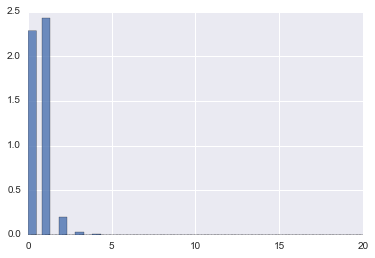

In [40]:
bins = np.linspace(0, 20, 100); nm=1; al=0.8; wid=0.5
plt.hist(x_missing, bins, normed=nm, alpha=al, width=wid)  # hist of first 30 day rides for missing rows
plt.show()

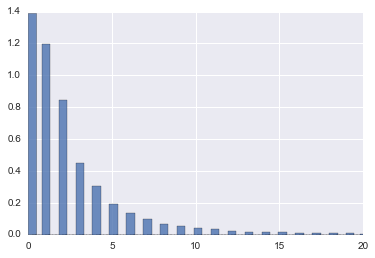

In [41]:
bins = np.linspace(0, 20, 100); nm=1; al=0.8; wid=0.5
plt.hist(x_complete, bins, normed=nm, alpha=al, width=wid)  # hist of first 30 day rides for complete rows
plt.show()

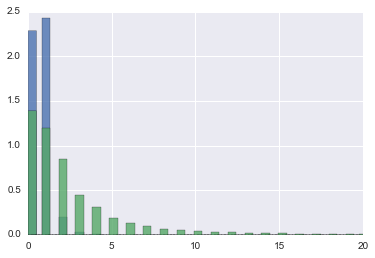

In [42]:
bins = np.linspace(0, 20, 100); nm=1; al=0.8; wid=0.5
plt.hist(x_missing, bins, normed=nm, alpha=al, width=wid)  # blue, hist of first 30 day rides for missing rows
plt.hist(x_complete, bins, normed=nm, alpha=al, width=wid)  # green, hist of first 30 day rides for complete rows
plt.show()

# blue count is added on top of green count
# appears that these are fast churners--people who left within the first month after only 0 or
# 1 rides with the company, so they never returned to the app and submitted a rating

In [43]:
# impute to mean
Org_Val = Df_org['avg_rating_of_driver'].mean() # storing a scalar
Df_org['avg_rating_of_driver'] = Df_org['avg_rating_of_driver'].fillna(Org_Val) # only looking at one column

In [44]:
Org_Val

4.6015592912744685

In [45]:
Df_org['avg_rating_of_driver'][0:10] # null values are now 4.6

0    4.700000
1    5.000000
2    4.300000
3    4.600000
4    4.400000
5    3.500000
6    4.601559
7    5.000000
8    4.500000
9    4.601559
Name: avg_rating_of_driver, dtype: float64

### phone

In [46]:
# look at cases where phone is null ==> drop or impute?
NullPhone = Df_org['phone'].isnull()
Df_org[NullPhone].describe()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,black_car_user,surge_pct,trips_in_first_30_days,weekday_pct,churn,days_from_first_signup
count,396.000000,393.000000,396.000000,396.000000,396.000000,396.000000,396.000000,396.000000,396.000000,396.000000
mean,7.225859,4.815522,4.611237,1.046338,0.611111,0.056205,2.396465,0.662187,0.664141,15.712121
std,9.185866,0.382844,0.533202,0.174052,0.488115,0.154043,3.717477,0.361401,0.472887,8.725516
min,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.857500,4.800000,4.600000,1.000000,0.000000,0.000000,1.000000,0.500000,0.000000,8.000000
50%,4.465000,5.000000,4.601559,1.000000,1.000000,0.000000,1.000000,0.741500,1.000000,17.000000
75%,8.652500,5.000000,5.000000,1.000000,1.000000,0.000000,2.000000,1.000000,1.000000,23.000000
max,129.890000,5.000000,5.000000,3.000000,1.000000,1.000000,27.000000,1.000000,1.000000,30.000000


In [47]:
Df_org.describe()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,black_car_user,surge_pct,trips_in_first_30_days,weekday_pct,churn,days_from_first_signup
count,50000.000000,49799.000000,50000.000000,50000.000000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.00000
mean,5.796827,4.778158,4.601559,1.074764,0.37708,0.088495,2.278200,0.609261,0.623920,15.54468
std,5.707357,0.446652,0.564977,0.222336,0.48466,0.199588,3.792684,0.370815,0.484405,8.75422
min,0.000000,1.000000,1.000000,1.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,2.420000,4.700000,4.500000,1.000000,0.00000,0.000000,0.000000,0.333000,0.000000,8.00000
50%,3.880000,5.000000,4.700000,1.000000,0.00000,0.000000,1.000000,0.667000,1.000000,16.00000
75%,6.940000,5.000000,5.000000,1.050000,1.00000,0.086000,3.000000,1.000000,1.000000,23.00000
max,160.960000,5.000000,5.000000,8.000000,1.00000,1.000000,125.000000,1.000000,1.000000,30.00000


In [48]:
Df_org.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
avg_dist                  50000 non-null float64
avg_rating_by_driver      49799 non-null float64
avg_rating_of_driver      50000 non-null float64
avg_surge                 50000 non-null float64
black_car_user            50000 non-null int64
city                      50000 non-null category
last_trip_date            50000 non-null datetime64[ns]
phone                     49604 non-null category
signup_date               50000 non-null datetime64[ns]
surge_pct                 50000 non-null float64
trips_in_first_30_days    50000 non-null float64
weekday_pct               50000 non-null float64
churn                     50000 non-null int64
days_from_first_signup    50000 non-null float64
dtypes: category(2), datetime64[ns](2), float64(8), int64(2)
memory usage: 4.7 MB


In [49]:
Df_org['phone'] = Df_org['phone'].astype('category')

In [50]:
Df_org.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
avg_dist                  50000 non-null float64
avg_rating_by_driver      49799 non-null float64
avg_rating_of_driver      50000 non-null float64
avg_surge                 50000 non-null float64
black_car_user            50000 non-null int64
city                      50000 non-null category
last_trip_date            50000 non-null datetime64[ns]
phone                     49604 non-null category
signup_date               50000 non-null datetime64[ns]
surge_pct                 50000 non-null float64
trips_in_first_30_days    50000 non-null float64
weekday_pct               50000 non-null float64
churn                     50000 non-null int64
days_from_first_signup    50000 non-null float64
dtypes: category(2), datetime64[ns](2), float64(8), int64(2)
memory usage: 4.7 MB


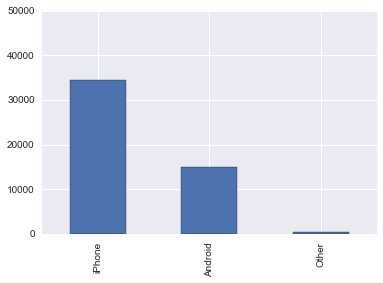

In [51]:
# longer distance, higher rating by driver, more likely to be weekday trip
# however, all deviations within 1 standard deviation so for our purposes these look like normal rides
# with a non-iPhone, non-Android phone type, so let's call them "Other" and keep the data.

# impute to "Other" type
ImpVal = 'Other'  # value to impute with
Col = Df_org['phone'].cat.add_categories(ImpVal)  # create new category for categorical var
Df_org['phone'] = Col.fillna(ImpVal)  # fill with impute value
Df_org['phone'].value_counts().plot(kind='bar', ylim=(0,50000))

### avg_rating_by_driver

In [52]:
# look at cases where avg_rating_by_driver is null ==> drop or impute?
NullArbd = Df_org['avg_rating_by_driver'].isnull()
Df_org[NullArbd].describe()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,black_car_user,surge_pct,trips_in_first_30_days,weekday_pct,churn,days_from_first_signup
count,201.000000,0.0,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000
mean,6.167164,NaN,4.551266,1.165821,0.169154,0.157547,0.552239,0.532338,0.820896,16.960199
std,12.259533,NaN,0.759647,0.471684,0.375824,0.363702,0.537129,0.500199,0.384397,7.978622
min,0.000000,NaN,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.980000,NaN,4.601559,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,11.000000
50%,3.360000,NaN,4.601559,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,18.000000
75%,6.370000,NaN,5.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,23.000000
max,160.960000,NaN,5.000000,4.000000,1.000000,1.000000,2.000000,1.000000,1.000000,30.000000


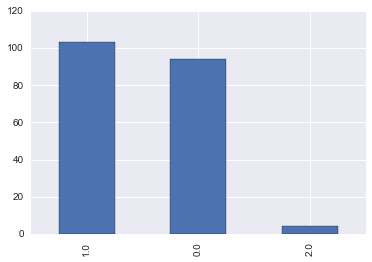

In [53]:
# check average rides in first month
Df_org.loc[NullArbd, 'trips_in_first_30_days'].value_counts().plot(kind='bar')
# .loc indexing - first argument which rows to give me, second says which columns to give back
# .loc next is aggregating function

In [54]:
Df_org.loc[NullArbd, 'trips_in_first_30_days'].value_counts()

1.0    103
0.0     94
2.0      4
Name: trips_in_first_30_days, dtype: int64

In [55]:
# appears as with avg_rating_of_driver these are customers who churned after 1/2 rides
# it's reasonable to assume they're average quality drivers and impute the mean

# impute to mean
ImpVal = Df_org['avg_rating_by_driver'].mean()
Df_org['avg_rating_by_driver'] = Df_org['avg_rating_by_driver'].fillna(ImpVal)

In [56]:
# did we get rid of all the nulls?
Df_org.isnull().sum()

avg_dist                  0
avg_rating_by_driver      0
avg_rating_of_driver      0
avg_surge                 0
black_car_user            0
city                      0
last_trip_date            0
phone                     0
signup_date               0
surge_pct                 0
trips_in_first_30_days    0
weekday_pct               0
churn                     0
days_from_first_signup    0
dtype: int64

# Feature Inspection

## Continuous Features

In [57]:
# Continuous: anything that's not boolean, any value that could take any decimal points or has a large range)
ColsCont = [
    'avg_dist',
    'avg_rating_by_driver',
    'avg_rating_of_driver',
    'avg_surge',
    'surge_pct',
    'trips_in_first_30_days',
    'weekday_pct',
    'days_from_first_signup'
    ]

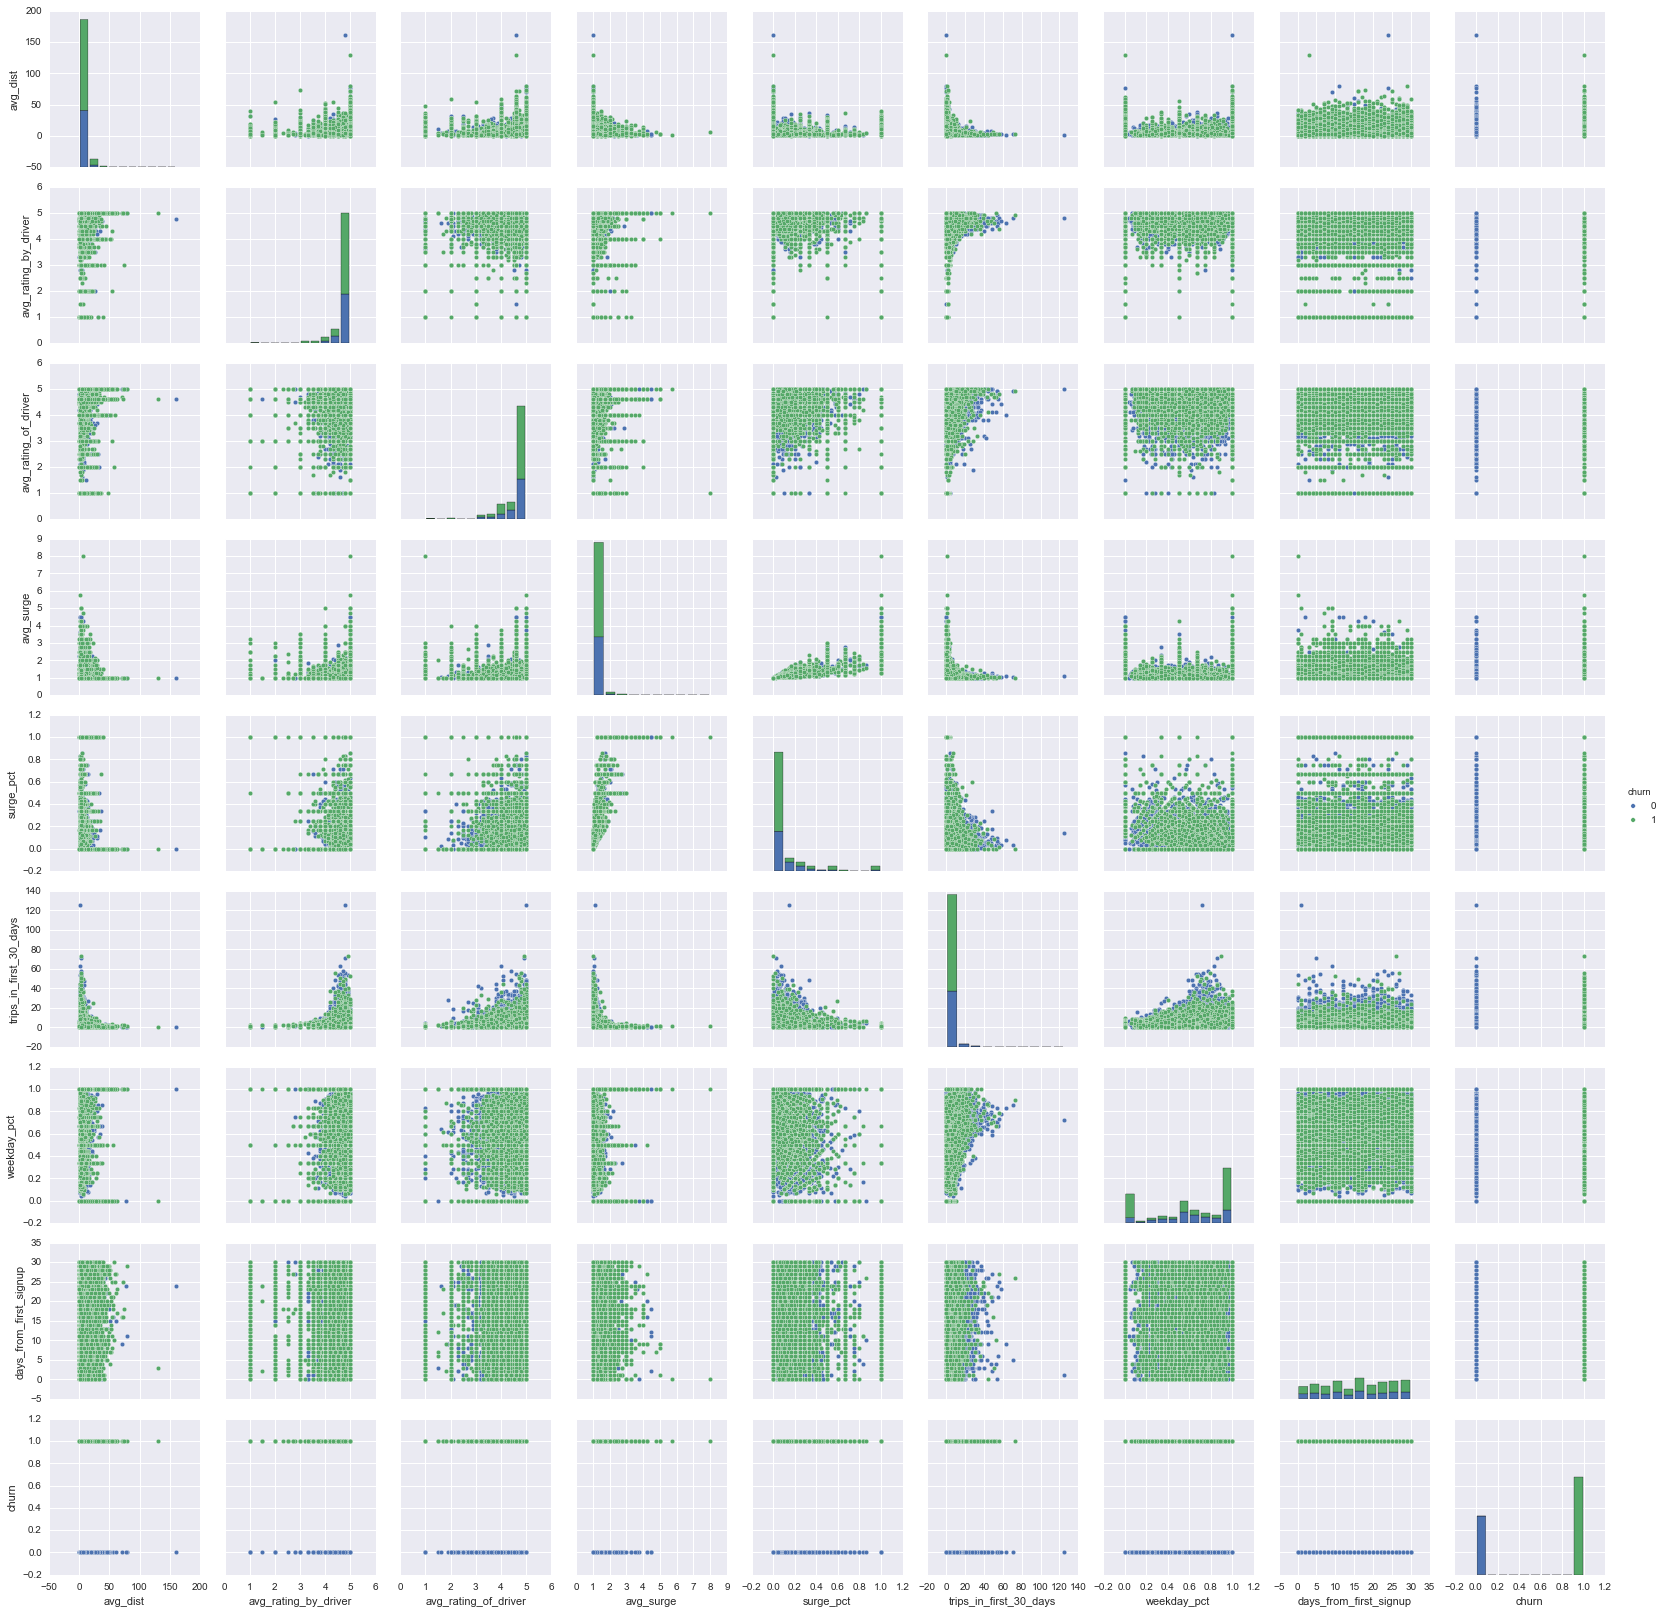

In [58]:
sns.pairplot(Df_org[ColsCont + ['churn']], hue='churn')
# if the two things together separate green (churn, they left) and blue, then they are pretty good predictors

### log1p transform

In [59]:
# First, look at histograms and diagnoals in the matrix
# Second, look at the bottom row to look at relationship with target variable

In [60]:
# Goal of transformation is to give features more spread
# Helps with Gradient Descent
# Helps with Separation
# Log and Exp are mirror images. To reverse the log of one value you take it's exponent
# Only look at histograms to determine log or exp
# Take Avg_Distance, numbers are too the left or low, so you take log transformation to spread them out. 
# Take Avg_rating_of_driver, histogram skewed to the right, so you take exp transformation to spread out left

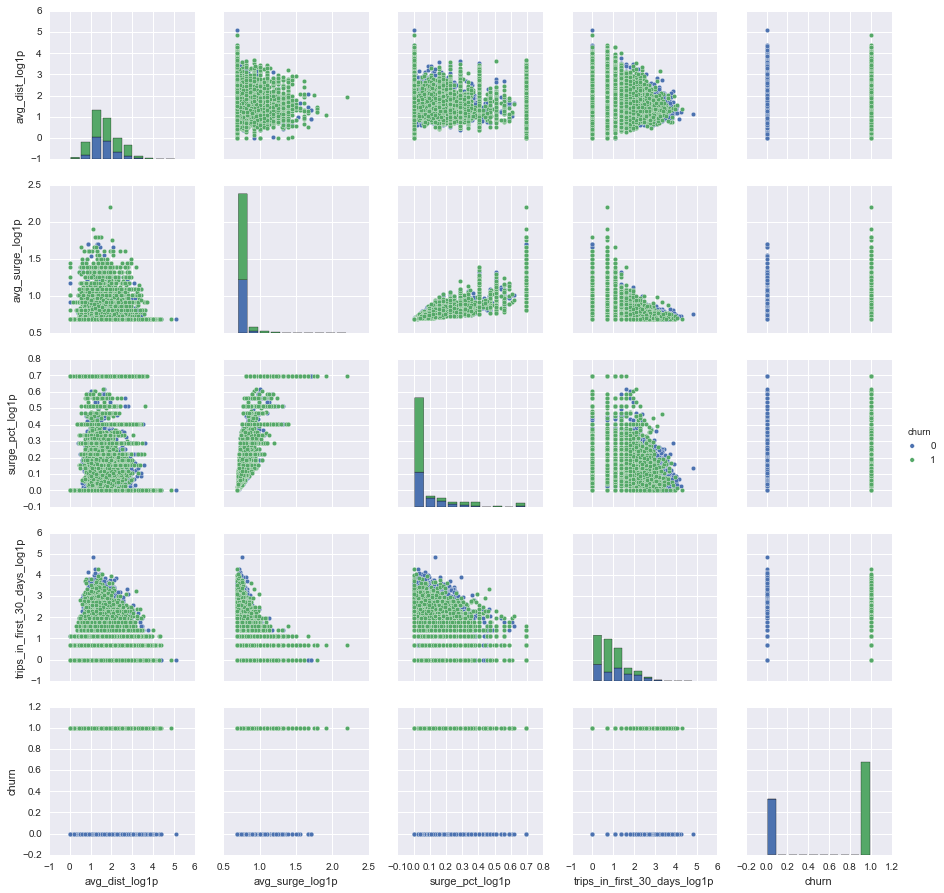

In [61]:
# Columns to show on log scale
ColsLog1p = [
    'avg_dist',
    'avg_surge',
    'surge_pct',
    'trips_in_first_30_days']

for c in ColsLog1p:
    NewField = c + '_log1p'
    Df_org[NewField] = np.log1p(Df_org[c]) # log1p adds 1 - feature plus 1, then take log. Log(0) is an error

NewColsLog1p = [c + '_log1p' for c in ColsLog1p]
# result
#['avg_dist_log1p',
# 'avg_surge_log1p',
# 'surge_pct_log1p',
# 'trips_in_first_30_days_log1p']

sns.pairplot(Df_org[NewColsLog1p + ['churn']], hue='churn') 
# avg_dist_log1p is very indicative of the new spread

### exp transform

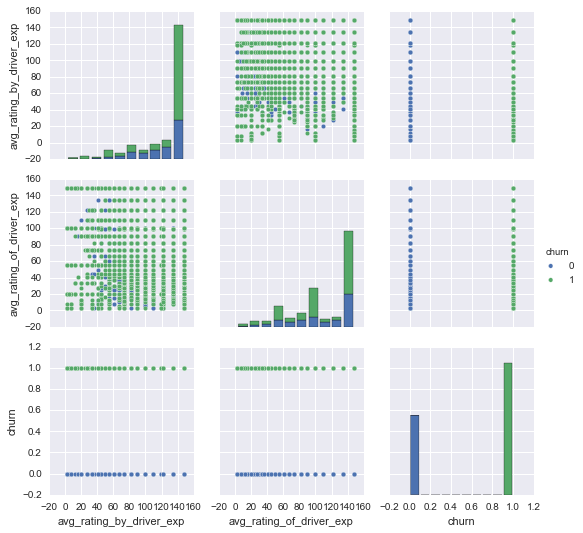

In [62]:
# Columns to Exp
ColsExp = [
    'avg_rating_by_driver',
    'avg_rating_of_driver']

for c in ColsExp:
    NewField = c + '_exp'
    Df_org[NewField] = np.exp(Df_org[c])

NewColsExp = [c + '_exp' for c in ColsExp]

sns.pairplot(Df_org[NewColsExp + ['churn']], hue='churn')

### Visualization of log1p and exp-transformed Fields

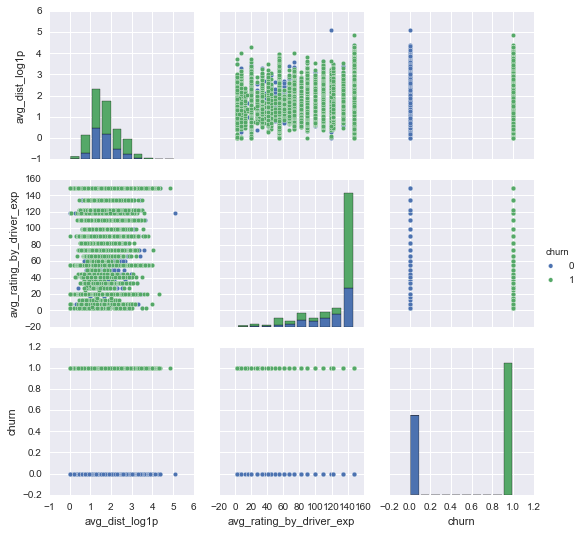

In [63]:
# visual comparison of transformation
# more clear that there is a slight positive relationship between these two variables distance and rating
# regression line here would have a higher r-squared than original 
ColsTest = [
    'avg_dist_log1p',
    'avg_rating_by_driver_exp']
sns.pairplot(Df_org[ColsTest + ['churn']], hue='churn')

In [64]:
# create df for transformed continuous features
TransCols = NewColsLog1p + NewColsExp
DropCols = ColsCont

# keep the original df and make another one for transformed cols
Df_orgTrans = Df_org.drop(DropCols, axis=1).sort_index(axis=1)  # remove untransformed columns
Df_org = Df_org.drop(TransCols, axis=1).sort_index(axis=1)  # remove transformed columns
# sort_index(axis=1) # reorganizes all the columns by name alphabetically

## Categorical Features

In [65]:
# No transformations done here. Can't manipulate categorical variables with log/exp transformations

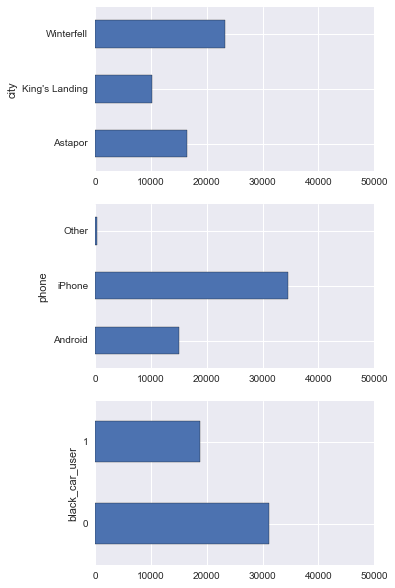

In [66]:
ColsNom = [
    'city',
    'phone',
    'black_car_user']

plt.figure(1)
plt.subplots(3, 1, figsize=(5, 10)); n=0
for Col in ColsNom:
    n+=1
    plt.subplot(3, 1, n)
    Df_orgTrans.groupby(Col).size().plot(kind='barh', xlim=(0,50000))

## Date Features

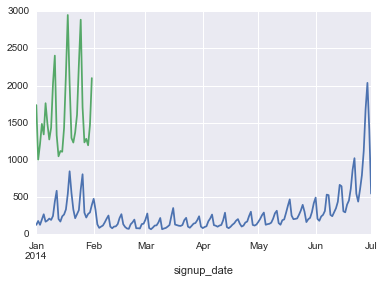

In [67]:
ColsDate = [
    'last_trip_date', # blue line
    'signup_date'] # green line

plt.figure(1)
for Col in ColsDate:
    Df_orgTrans.groupby(Col).size().plot(kind='line')

# Feature Scaling and Preprocessing

In [68]:
# pick dataframe
Df = Df_org  # the one with imputed values

In [69]:
# isolate target
y = np.where(Df['churn'] == True, 1, 0)

In [70]:
# convert continuous variables to standard scalar

In [71]:
scaler = preprocessing.StandardScaler()
features_cont = Df.dtypes[Df.dtypes.values == 'float64'].index.tolist()

In [72]:
features_cont

[u'avg_dist',
 u'avg_rating_by_driver',
 u'avg_rating_of_driver',
 u'avg_surge',
 'days_from_first_signup',
 u'surge_pct',
 u'trips_in_first_30_days',
 u'weekday_pct']

In [73]:
X_cont = Df[features_cont].as_matrix().astype(np.float)

In [74]:
X_cont

array([[ 3.67      ,  5.        ,  4.7       , ...,  0.154     ,
         4.        ,  0.462     ],
       [ 8.26      ,  5.        ,  5.        , ...,  0.        ,
         0.        ,  0.5       ],
       [ 0.77      ,  5.        ,  4.3       , ...,  0.        ,
         3.        ,  1.        ],
       ..., 
       [ 3.86      ,  5.        ,  5.        , ...,  0.        ,
         0.        ,  1.        ],
       [ 4.58      ,  3.5       ,  3.        , ...,  0.        ,
         2.        ,  1.        ],
       [ 3.49      ,  5.        ,  4.60155929, ...,  0.        ,
         0.        ,  0.        ]])

In [75]:
X_cont = scaler.fit_transform(X_cont)

In [76]:
X_cont # sloppy way to log transformation. Standard Scaler is more common. It's quicker because you don't have to 
# look at pairplots to see what kind of transformation. Goal is to get better spread, center distribution, put
# everything on same scale.

array([[ -3.72650244e-01,   4.97683632e-01,   1.74240305e-01, ...,
          3.28202393e-01,   4.53983824e-01,  -3.97131451e-01],
       [  4.31582983e-01,   4.97683632e-01,   7.05241067e-01, ...,
         -4.43394376e-01,  -6.00688784e-01,  -2.94653460e-01],
       [ -8.80771455e-01,   4.97683632e-01,  -5.33760712e-01, ...,
         -4.43394376e-01,   1.90315672e-01,   1.05374117e+00],
       ..., 
       [ -3.39359544e-01,   4.97683632e-01,   7.05241067e-01, ...,
         -4.43394376e-01,  -6.00688784e-01,   1.05374117e+00],
       [ -2.13205312e-01,  -2.86744158e+00,  -2.83476401e+00, ...,
         -4.43394376e-01,  -7.33524799e-02,   1.05374117e+00],
       [ -4.04188802e-01,   4.97683632e-01,  -2.76685738e-13, ...,
         -4.43394376e-01,  -6.00688784e-01,  -1.64304809e+00]])

In [77]:
# dummify categoricals
onehot = pd.get_dummies(Df[['phone', 'city']])  # convert to binary
onehot.head()

,phone_Android,phone_iPhone,phone_Other,city_Astapor,city_King's Landing,city_Winterfell
0,0,1,0,0,1,0
1,1,0,0,1,0,0
2,0,1,0,1,0,0
3,0,1,0,0,1,0
4,1,0,0,0,0,1


In [78]:
Df = pd.concat([Df, onehot], axis=1)  # append new fields to df

In [79]:
# drop unneeded fields
to_drop = ['signup_date','last_trip_date', 'phone', 'city', 'churn']
Df = Df.drop(to_drop, axis=1)

In [80]:
# extract boolean

In [81]:
features_bool = Df.dtypes[Df.dtypes.values != 'float64'].index.tolist()

In [82]:
features_bool

[u'black_car_user',
 u'phone_Android',
 u'phone_iPhone',
 u'phone_Other',
 u'city_Astapor',
 u"city_King's Landing",
 u'city_Winterfell']

In [83]:
X_bool = Df[features_bool].as_matrix().astype(np.float)

In [84]:
X_bool

array([[ 1.,  0.,  1., ...,  0.,  1.,  0.],
       [ 0.,  1.,  0., ...,  1.,  0.,  0.],
       [ 0.,  0.,  1., ...,  1.,  0.,  0.],
       ..., 
       [ 1.,  1.,  0., ...,  0.,  0.,  1.],
       [ 0.,  0.,  1., ...,  1.,  0.,  0.],
       [ 0.,  1.,  0., ...,  1.,  0.,  0.]])

In [85]:
# aggregate features

In [86]:
features = features_cont + features_bool
features

[u'avg_dist',
 u'avg_rating_by_driver',
 u'avg_rating_of_driver',
 u'avg_surge',
 'days_from_first_signup',
 u'surge_pct',
 u'trips_in_first_30_days',
 u'weekday_pct',
 u'black_car_user',
 u'phone_Android',
 u'phone_iPhone',
 u'phone_Other',
 u'city_Astapor',
 u"city_King's Landing",
 u'city_Winterfell']

In [87]:
# scikit learn only wants numpy vectors and matrixes. Go from numpy objects to scikit learn models

In [88]:
X = np.hstack([X_cont, X_bool])
X

array([[ -3.72650244e-01,   4.97683632e-01,   1.74240305e-01, ...,
          0.00000000e+00,   1.00000000e+00,   0.00000000e+00],
       [  4.31582983e-01,   4.97683632e-01,   7.05241067e-01, ...,
          1.00000000e+00,   0.00000000e+00,   0.00000000e+00],
       [ -8.80771455e-01,   4.97683632e-01,  -5.33760712e-01, ...,
          1.00000000e+00,   0.00000000e+00,   0.00000000e+00],
       ..., 
       [ -3.39359544e-01,   4.97683632e-01,   7.05241067e-01, ...,
          0.00000000e+00,   0.00000000e+00,   1.00000000e+00],
       [ -2.13205312e-01,  -2.86744158e+00,  -2.83476401e+00, ...,
          1.00000000e+00,   0.00000000e+00,   0.00000000e+00],
       [ -4.04188802e-01,   4.97683632e-01,  -2.76685738e-13, ...,
          1.00000000e+00,   0.00000000e+00,   0.00000000e+00]])

In [89]:
# create dataframe
DfScaled = pd.DataFrame(X, columns=features)
DfScaled['churn'] = y

In [90]:
DfScaled.head(5)

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,days_from_first_signup,surge_pct,trips_in_first_30_days,weekday_pct,black_car_user,phone_Android,phone_iPhone,phone_Other,city_Astapor,city_King's Landing,city_Winterfell,churn
0,-0.372650,0.497684,0.174240,0.113506,0.965866,0.328202,0.453984,-0.397131,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0
1,0.431583,0.497684,0.705241,-0.336268,1.422793,-0.443394,-0.600689,-0.294653,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1
2,-0.880771,0.497684,-0.533761,-0.336268,-1.204537,-0.443394,0.190316,1.053741,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1
3,-0.602181,0.273342,-0.002760,0.293416,-0.747610,0.558679,1.772325,0.514383,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0
4,-0.467266,0.273342,-0.356760,0.518303,1.194330,0.147829,3.090665,0.579106,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1


In [91]:
# look at data ranges
DfScaled.describe()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,days_from_first_signup,surge_pct,trips_in_first_30_days,weekday_pct,black_car_user,phone_Android,phone_iPhone,phone_Other,city_Astapor,city_King's Landing,city_Winterfell,churn
count,5.000000e+04,5.000000e+04,5.000000e+04,5.000000e+04,5.000000e+04,5.000000e+04,5.000000e+04,5.000000e+04,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,-2.558398e-17,4.787948e-16,8.195219e-16,6.134493e-16,-1.039335e-17,7.034640e-16,-8.546253e-16,1.555303e-15,0.37708,0.300440,0.691640,0.007920,0.330680,0.202600,0.466720,0.623920
std,1.000010e+00,1.000010e+00,1.000010e+00,1.000010e+00,1.000010e+00,1.000010e+00,1.000010e+00,1.000010e+00,0.48466,0.458454,0.461821,0.088642,0.470463,0.401941,0.498896,0.484405
min,-1.015686e+00,-8.475984e+00,-6.374769e+00,-3.362683e-01,-1.775696e+00,-4.433944e-01,-6.006888e-01,-1.643048e+00,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-5.916680e-01,-1.753414e-01,-1.797602e-01,-3.362683e-01,-8.618421e-01,-4.433944e-01,-6.006888e-01,-7.450173e-01,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,-3.358553e-01,4.976836e-01,1.742403e-01,-3.362683e-01,5.201200e-02,-4.433944e-01,-3.370206e-01,1.557103e-01,0.00000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,2.003002e-01,4.976836e-01,7.052411e-01,-1.113812e-01,8.516343e-01,-1.250267e-02,1.903157e-01,1.053741e+00,1.00000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000
max,2.718679e+01,4.976836e-01,7.052411e-01,3.114793e+01,1.651257e+00,4.566974e+00,3.235783e+01,1.053741e+00,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Feature Selection

In [92]:
# train/test split for feature selection
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

## Correlation

In [93]:
# correlation matrix
DfHeatmap = DfScaled.corr()
DfHeatmap

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,days_from_first_signup,surge_pct,trips_in_first_30_days,weekday_pct,black_car_user,phone_Android,phone_iPhone,phone_Other,city_Astapor,city_King's Landing,city_Winterfell,churn
avg_dist,1.000000,0.079793,0.028508,-0.081491,0.017274,-0.104414,-0.136329,0.101652,0.032310,0.020888,-0.025030,0.022372,-0.045431,0.015877,0.030050,0.092780
avg_rating_by_driver,0.079793,1.000000,0.101660,0.010498,0.002197,0.019964,-0.039097,0.020366,0.009328,0.008765,-0.010127,0.007433,0.032518,0.084480,-0.098727,0.026748
avg_rating_of_driver,0.028508,0.101660,1.000000,-0.021653,0.005995,-0.003290,-0.011060,0.012587,-0.001916,0.024206,-0.024323,0.001530,0.029814,0.082156,-0.094304,0.010829
avg_surge,-0.081491,0.010498,-0.021653,1.000000,-0.006944,0.793582,-0.001841,-0.110071,-0.078791,-0.008977,0.011104,-0.011423,0.037172,-0.009198,-0.027643,0.003333
days_from_first_signup,0.017274,0.002197,0.005995,-0.006944,1.000000,0.001667,0.012351,0.007367,-0.007398,0.014516,-0.014738,0.001709,0.017547,0.025171,-0.036826,0.020211
surge_pct,-0.104414,0.019964,-0.003290,0.793582,0.001667,1.000000,0.005720,-0.144918,-0.106861,-0.010150,0.012851,-0.014456,0.045457,0.028221,-0.065603,-0.011797
trips_in_first_30_days,-0.136329,-0.039097,-0.011060,-0.001841,0.012351,0.005720,1.000000,0.050388,0.112210,-0.059309,0.058342,0.002786,-0.061075,0.024650,0.037735,-0.210463
weekday_pct,0.101652,0.020366,0.012587,-0.110071,0.007367,-0.144918,0.050388,1.000000,0.035998,-0.009241,0.006726,0.012753,-0.010540,0.031349,-0.015318,-0.009693
black_car_user,0.032310,0.009328,-0.001916,-0.078791,-0.007398,-0.106861,0.112210,0.035998,1.000000,-0.075836,0.067002,0.043145,0.021259,0.039649,-0.051990,-0.205002
phone_Android,0.020888,0.008765,0.024206,-0.008977,0.014516,-0.010150,-0.059309,-0.009241,-0.075836,1.000000,-0.981471,-0.058554,0.025642,-0.059203,0.023517,0.225464


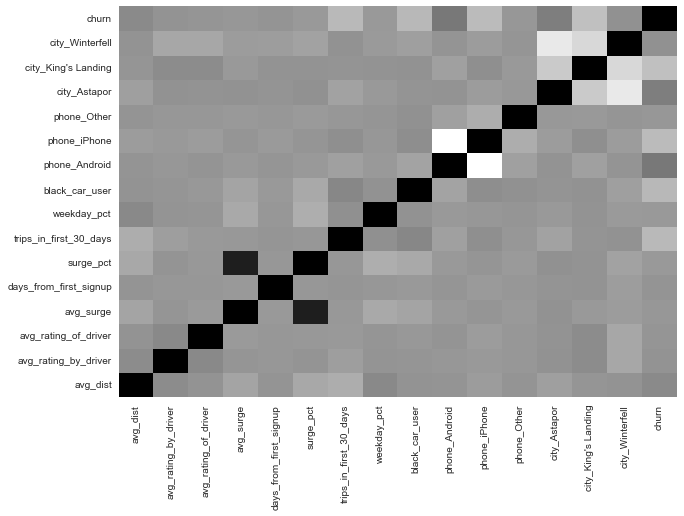

In [94]:
# matrix as heatmap
plt.figure(figsize=(10,7))
plt.pcolor(DfHeatmap)
plt.yticks(np.arange(0.5, len(DfHeatmap.index), 1), DfHeatmap.index)
plt.xticks(np.arange(0.5, len(DfHeatmap.columns), 1), DfHeatmap.columns, rotation='vertical')
plt.show()

## L1 Regularization

In [95]:
# Regularization - goal is to penalize you for putting too much weight on all of these features, what are the optimal 
# values of the coefficients with cost function. L1 and L2 stop model from chasing any signal it finds, be selective,
# focus on things that provide value, penalizes model for getting to enthusiastic. If there was no regularization 
# parameter, all variables will be high

In [96]:
# ???? Go over L1 Reg penalty
# train with l1/lasso
lr = LogisticRegression(penalty='l1', C=0.01)
lr.fit(X_train, y_train)

LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

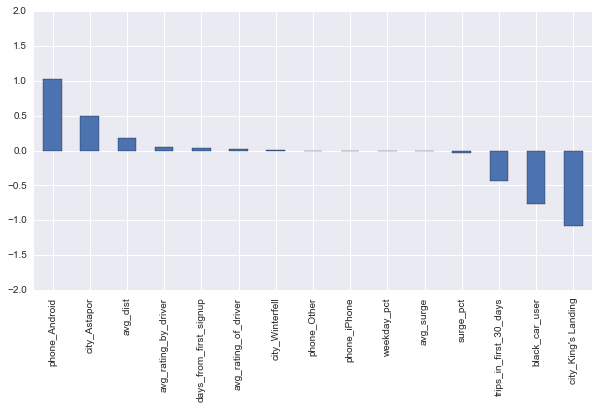

In [97]:
# plot weights
lr_coefficients = pd.Series(lr.coef_[0], index=features).sort_values(ascending=False)
plt.figure(1, figsize=(10, 5))
lr_coefficients.plot(kind='bar', ylim=(-2,2))

In [98]:
# accuracy
print('Training accuracy:', lr.score(X_train, y_train))
print('Test accuracy:', lr.score(X_test, y_test))
# look at them together, like coefficients like phones. Android users are likely to churn
# astoper more likely to churn then winterfell then king's landing

('Training accuracy:', 0.71545000000000003)
('Test accuracy:', 0.72330000000000005)


In [99]:
lr.coef_

array([[ 0.18609207,  0.05470048,  0.02258329,  0.        ,  0.03784855,
        -0.03219753, -0.43252994,  0.        , -0.76906383,  1.02818078,
         0.        ,  0.        ,  0.50216655, -1.07981641,  0.00604888]])

## Random Forest Feature Importance

('Training accuracy:', 0.99990000000000001)
('Test accuracy:', 0.77549999999999997)


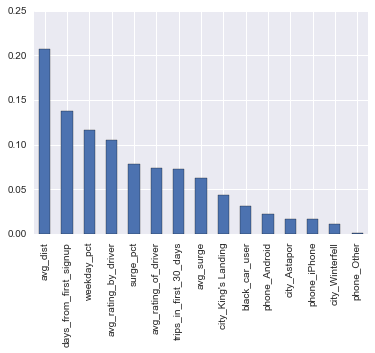

In [100]:
rf = RandomForestClassifier(n_estimators=100, n_jobs=-1)
rf.fit(X_train, y_train)

rf_importances = rf.feature_importances_.tolist()
pd.Series(rf_importances, index=features).sort_values(ascending=False).plot(kind='bar')

print('Training accuracy:', rf.score(X_train, y_train))
print('Test accuracy:', rf.score(X_test, y_test))

## Recursive Features Elimination

In [ ]:
# starts with full model and then removes feature, did removing it affect model. If no, removes it.

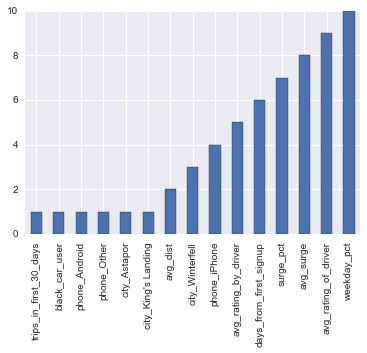

In [101]:
from sklearn.feature_selection import RFE

# with logistic regression

model = LogisticRegression(penalty='l1', C=100, n_jobs=-1)
# create the RFE model and select 3 attributes
rfe = RFE(model, n_features_to_select=6, step=1)
rfe = rfe.fit(X_train, y_train)

# summarize the selection of the attributes
pd.Series(rfe.ranking_.tolist(), index=features).sort_values().plot(kind='bar')

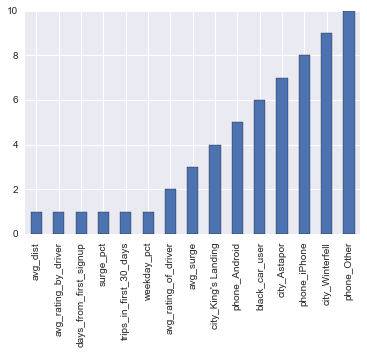

In [102]:
# with random forest
model = RandomForestClassifier(n_estimators=100, n_jobs=-1)
# create the RFE model and select 3 attributes
rfe = RFE(model, n_features_to_select=6, step=1)
rfe = rfe.fit(X_train, y_train)

# summarize the selection of the attributes
pd.Series(rfe.ranking_.tolist(), index=features).sort_values().plot(kind='bar')

# Horse Race

## Run Models (without tuning)

In [103]:
from sklearn.model_selection import cross_val_predict

# create dict of models
models_dict = {
    'Neural Net':          MLPClassifier(activation='relu'),
    'Random Forest':       RandomForestClassifier(n_estimators=100),
    'KNN':                 KNeighborsClassifier(n_neighbors=11),
    'Logistic Regression': LogisticRegression(C=1000),
    'Naive Bayes':         GaussianNB(),
    }

In [ ]:
# run models and get output
predictions_dict = {}
for model in models_dict:
    y_pred = cross_val_predict(models_dict[model], X=X, y=y, cv=10, n_jobs=-1)
    predictions_dict[model] = y_pred
    print model + ' metrics:\n---------------------------------'
    print 'Accuracy: {0}'.format(str(round(metrics.accuracy_score(y, y_pred), 3)))
    print 'AUC: {0}'.format(str(round(metrics.roc_auc_score(y, y_score=y_pred), 3)))
    print 'Classification Report:\n{0}\n\n'.format(metrics.classification_report(y, y_pred))

KNN metrics:
---------------------------------
Accuracy: 0.754
AUC: 0.727
Classification Report:
             precision    recall  f1-score   support

          0       0.69      0.62      0.65     18804
          1       0.78      0.84      0.81     31196

avg / total       0.75      0.75      0.75     50000





In [ ]:
# lesson of the day: neural networks
y_pred_all = np.array([sum(values) for values in zip(*predictions_dict.values())], dtype=float)
y_pred_all_bin = np.where((y_pred_all/y_pred_all.max()) > 0.5, 1, 0)

model = 'Class Vote'; y_pred = y_pred_all_bin
print model + ' metrics:\n---------------------------------'
print 'Accuracy: {0}'.format(str(round(metrics.accuracy_score(y, y_pred), 3)))
print 'AUC: {0}'.format(str(round(metrics.roc_auc_score(y, y_score=y_pred), 3)))
print 'Classification Report:\n{0}\n\n'.format(metrics.classification_report(y, y_pred))